# Project Title: How long does it take for funding activity to recover after 2008 financial crisis(late 2007 - mid 2009).

## Main dataset: Startup investments


# Introduction 
This research aims in analyze the impact of major economic events(currently thinking of 2008 financial crisis period)on startup funding activity and determine how long it takes for different industries to recover to pre-event funding levels, and analyze why some specific industries might recover faster and some recover slower

In [114]:
pip install -q nbconvert


[notice] A new release of pip is available: 23.2.1 -> 25.0
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [115]:
pip install -q pyppeteer


[notice] A new release of pip is available: 23.2.1 -> 25.0
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [116]:
pip install -q qeds


[notice] A new release of pip is available: 23.2.1 -> 25.0
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [117]:
import pandas as pd
import numpy as np

from IPython.display import display

# Import and clean the data

In [118]:
objects = pd.read_csv("/Users/zzybollar/Downloads/archive/objects.csv")
offices = pd.read_csv("/Users/zzybollar/Downloads/archive/offices.csv")
funds = pd.read_csv("/Users/zzybollar/Downloads/archive/funds.csv")
investments = pd.read_csv("/Users/zzybollar/Downloads/archive/investments.csv")


/var/folders/lh/v36j2zlj0t9_xqpxcj3l9qfw0000gn/T/ipykernel_9161/2771531094.py:1: DtypeWarning: Columns (3,7,9,10,17,18,21,22,23,25,26,29,30,37) have mixed types. Specify dtype option on import or set low_memory=False.
  objects = pd.read_csv("/Users/zzybollar/Downloads/archive/objects.csv")


In [119]:
funds = funds.dropna()
investments = investments.dropna()
offices = offices.dropna()
objects = objects.dropna()

In [120]:
unique_countries = offices["country_code"].unique()
unique_countries

array([], dtype=object)

In [121]:
funds['funded_at'] = pd.to_datetime(funds['funded_at'], errors='coerce')
start_date = "2007-10-01"
end_date = "2009-06-30"
funding_during_crisis = funds[(funds['funded_at'] >= start_date) & (funds['funded_at'] <= end_date)]
funding_during_crisis = funding_during_crisis[["id", "fund_id","object_id","name",
                                     "funded_at","raised_amount","raised_currency_code"]]
funding_during_crisis = funding_during_crisis.sort_values(by='funded_at', ascending=True)



In [122]:
funds['funded_at'] = pd.to_datetime(funds['funded_at'], errors='coerce')
start_date = "2006-01-01"
end_date = "2007-09-30"
funding_before_crisis = funds[(funds['funded_at'] >= start_date) & (funds['funded_at'] <= end_date)]
funding_before_crisis = funding_before_crisis[["id", "fund_id","object_id","name",
                                     "funded_at","raised_amount","raised_currency_code"]]
funding_before_crisis = funding_before_crisis.sort_values(by='funded_at', ascending=True)
funding_before_crisis

,id,fund_id,object_id,name,funded_at,raised_amount,raised_currency_code
123,129,129,f:1407,Conor Technology Fund I Ky,2006-01-01,30000000.0,USD
242,263,263,f:375,Greycroft Partners I,2006-01-01,75000000.0,USD
747,814,814,f:189,Apax US VII,2006-01-01,856300000.0,USD
125,131,131,f:2140,5AM Ventures II,2006-01-01,150000000.0,USD
239,260,260,f:512,Eclipse 3&4,2006-03-01,60000000.0,GBP
729,794,794,f:392,Focus Ventures III,2006-04-18,250000000.0,USD
267,290,290,f:1926,NV Partners IV LP,2006-06-06,275000000.0,USD
543,597,597,f:966,Amadeus & Angels Seed Fund,2006-11-06,20.0,GBP
694,759,759,f:7238,Inflexion Fund II,2006-11-13,165000000.0,GBP
1332,1453,1453,f:1165,TCEE Fund II,2007-01-01,40000000.0,EUR


In [123]:
funds['funded_at'] = pd.to_datetime(funds['funded_at'], errors='coerce')
start_date = "2009-07-01"
end_date = "2010-12-31"
funding_after_crisis = funds[(funds['funded_at'] >= start_date) & (funds['funded_at'] <= end_date)]
funding_after_crisis = funding_after_crisis[["id", "fund_id","object_id","name",
                                     "funded_at","raised_amount","raised_currency_code"]]
funding_after_crisis = funding_after_crisis.sort_values(by='funded_at', ascending=True)

In [124]:
investments = investments.dropna(subset=['id', 'investor_object_id'])
investments = investments.drop(columns=['created_at', 'updated_at'])

# Visualize the data

In [125]:
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import qeds
import seaborn as sns


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


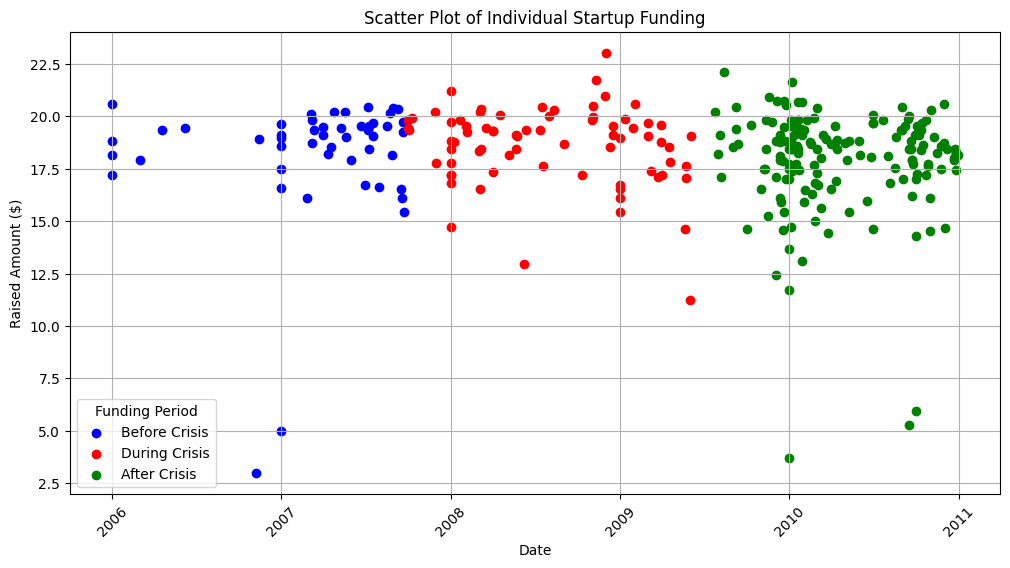

In [127]:
funding_before_crisis['raised_amount_log'] = np.log(funding_before_crisis['raised_amount'])
funding_during_crisis['raised_amount_log'] = np.log(funding_during_crisis['raised_amount'])
funding_after_crisis['raised_amount_log'] = np.log(funding_after_crisis['raised_amount'])


plt.figure(figsize=(12, 6))

plt.scatter(funding_before_crisis["funded_at"], funding_before_crisis["raised_amount_log"], label="Before Crisis", color="blue", alpha=1)
plt.scatter(funding_during_crisis["funded_at"], funding_during_crisis["raised_amount_log"], label="During Crisis", color="red", alpha=1)
plt.scatter(funding_after_crisis["funded_at"], funding_after_crisis["raised_amount_log"], label="After Crisis", color="green", alpha=1)

plt.title("Scatter Plot of Individual Startup Funding")
plt.xlabel("Date")
plt.ylabel("Raised Amount ($)")
plt.legend(title="Funding Period")
plt.xticks(rotation=45)
plt.grid(True)

In [128]:
for df in [funding_before_crisis, funding_during_crisis, funding_after_crisis]:
    df["raised_amount_log"] = np.log1p(df["raised_amount"])
    
funding_before_crisis["Period"] = "Before Crisis"
funding_during_crisis["Period"] = "During Crisis"
funding_after_crisis["Period"] = "After Crisis"

In [129]:
funding_data = pd.concat([funding_before_crisis, funding_during_crisis, funding_after_crisis])
raised_amount_log = np.log(funding_data["raised_amount"])

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


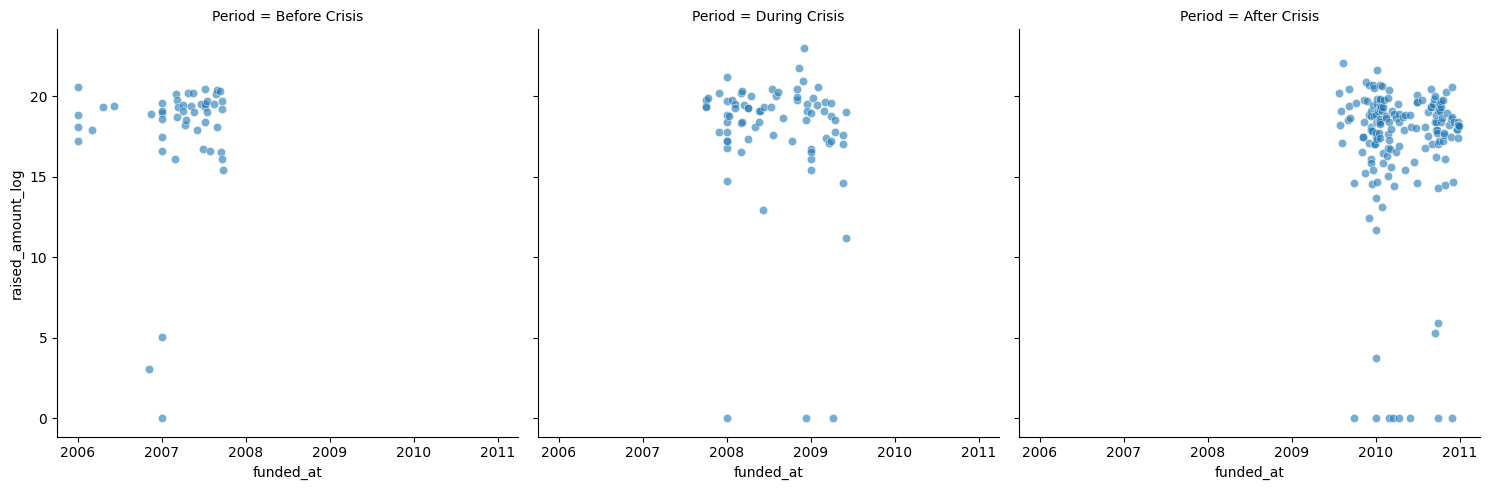

In [130]:
g = sns.FacetGrid(funding_data, col="Period", col_wrap=3, height=5, sharex=True, sharey=True)
g.map_dataframe(sns.scatterplot, x="funded_at", y="raised_amount_log", alpha=0.6)